In [1]:
import pandas as pd

df_train = pd.read_csv('Dataset/conjunto_de_treinamento.csv')
df_train.drop(columns=['id_solicitante'], inplace=True)

df_test = pd.read_csv('Dataset/conjunto_de_teste.csv')
df_test.drop(columns=['id_solicitante'], inplace=True)


In [2]:
# Tratando das colunas nominais

## Variáveis binárias
yn = [df_train.columns[12],
df_train.columns[16],
df_train.columns[29],
df_train.columns[31]]

for i in range(len(yn)):
    df_train[yn[i]] = df_train[yn[i]].map({'N': 0, 'Y': 1})

df_train['sexo'] = df_train['sexo'].map({'M': 0, 'F': 1, 'N': None})
df_train['forma_envio_solicitacao'] = df_train['forma_envio_solicitacao'].map({'internet': 0, 'correio': 1, 'presencial': 2})

## Variáveis nominais
def estados_format(df, column):
    return df[column].map({'AC': 0, 'AL': 1, 'AM': 2, 'AP': 3, 'BA': 4, 'CE': 5, 'DF': 6, 'ES': 7, 'GO': 8, 'MA': 9, 'MG': 10, 'MS': 11, 'MT': 12, 'PA': 13, 'PB': 14, 'PE': 15, 'PI': 16, 'PR': 17, 'RJ': 18, 'RN': 19, 'RO': 20, 'RR': 21, 'RS': 22, 'SC': 23, 'SE': 24, 'SP': 25, 'TO': 26})

df_train['estado_onde_nasceu'] = estados_format(df_train, 'estado_onde_nasceu')
df_train['estado_onde_reside'] = estados_format(df_train, 'estado_onde_reside')
df_train['estado_onde_trabalha'] = estados_format(df_train, 'estado_onde_trabalha')

## Preenchendo categorias incompletas
df_train['profissao_companheiro'].fillna(-1, inplace=True)
df_train['profissao'].fillna(-1, inplace=True)
df_train['grau_instrucao'].fillna(-1, inplace=True)
df_train['ocupacao'].fillna(-1, inplace=True)

## Transformando categorias str em int
def tel_format(df, column):
    df[column].replace(' ', -1, inplace=True)
    return df[column].map(int)

df_train['codigo_area_telefone_trabalho'] = tel_format(df_train, 'codigo_area_telefone_trabalho')
df_train['codigo_area_telefone_residencial'] = tel_format(df_train, 'codigo_area_telefone_residencial')

In [3]:
# Tratando das colunas nominais

## Variáveis binárias
yn = [df_test.columns[12],
df_test.columns[16],
df_test.columns[29],
df_test.columns[31]]

for i in range(len(yn)):
    df_test[yn[i]] = df_test[yn[i]].map({'N': 0, 'Y': 1})

df_test['sexo'] = df_test['sexo'].map({'M': 0, 'F': 1, 'N': None})
df_test['forma_envio_solicitacao'] = df_test['forma_envio_solicitacao'].map({'internet': 0, 'correio': 1, 'presencial': 2})

## Variáveis nominais
def estados_format(df, column):
    return df[column].map({'AC': 0, 'AL': 1, 'AM': 2, 'AP': 3, 'BA': 4, 'CE': 5, 'DF': 6, 'ES': 7, 'GO': 8, 'MA': 9, 'MG': 10, 'MS': 11, 'MT': 12, 'PA': 13, 'PB': 14, 'PE': 15, 'PI': 16, 'PR': 17, 'RJ': 18, 'RN': 19, 'RO': 20, 'RR': 21, 'RS': 22, 'SC': 23, 'SE': 24, 'SP': 25, 'TO': 26})

df_test['estado_onde_nasceu'] = estados_format(df_test, 'estado_onde_nasceu')
df_test['estado_onde_reside'] = estados_format(df_test, 'estado_onde_reside')
df_test['estado_onde_trabalha'] = estados_format(df_test, 'estado_onde_trabalha')

## Preenchendo categorias incompletas
df_test['profissao_companheiro'].fillna(-1, inplace=True)
df_test['profissao'].fillna(-1, inplace=True)
df_test['grau_instrucao'].fillna(-1, inplace=True)
df_test['ocupacao'].fillna(-1, inplace=True)

## Transformando categorias str em int
def tel_format(df, column):
    df[column].replace(' ', -1, inplace=True)
    return df[column].map(int)

df_test['codigo_area_telefone_trabalho'] = tel_format(df_test, 'codigo_area_telefone_trabalho')
df_test['codigo_area_telefone_residencial'] = tel_format(df_test, 'codigo_area_telefone_residencial')

In [5]:
for i in range(len(df_train.columns)):
    if df_train[df_train.columns[i]].isnull().sum() > 0:
        df_train[df_train.columns[i]].fillna(df_train[df_train.columns[i]].mean(), inplace=True)
        print(df_train.columns[i],
              df_train[f'{df_train.columns[i]}'].unique())
df_train.head()

produto_solicitado  dia_vencimento  forma_envio_solicitacao  tipo_endereco  \
0                   1              10                        2              1   
1                   1              25                        0              1   
2                   1              20                        0              1   
3                   1              20                        0              1   
4                   7               1                        0              1   

   sexo  idade  estado_civil  qtde_dependentes  grau_instrucao  nacionalidade  \
0   0.0     85             2                 0               0              1   
1   1.0     38             1                 0               0              1   
2   1.0     37             2                 0               0              1   
3   0.0     37             1                 1               0              1   
4   1.0     51             1                 3               0              1   

   ...  possui_telefone_trabalho  codigo_area_telefone_trabalho  \
0  ...                         0                             -1   
1  ...                         0                             -1   
2  ...                         0                             -1   
3  ...                         1                             54   
4  ...                         0                             -1   

   meses_no_trabalho  profissao  ocupacao  profissao_companheiro  \
0                  0        9.0       1.0                    0.0   
1                  0        2.0       5.0                   -1.0   
2                  0       -1.0      -1.0                   -1.0   
3                  0        9.0       2.0                   -1.0   
4                  0        9.0       5.0                   -1.0   

   grau_instrucao_companheiro  local_onde_reside  local_onde_trabalha  \
0                    0.000000              600.0                600.0   
1                    0.288095              492.0                492.0   
2                    0.288095              450.0                450.0   
3                    0.288095              932.0                932.0   
4                    0.288095              440.0                440.0   

   inadimplente  
0             0  
1             0  
2             1  
3             1  
4             1  

[5 rows x 41 columns]

In [7]:
for i in range(len(df_test.columns)):
    if df_test[df_test.columns[i]].isnull().sum() > 0:
        df_test[df_test.columns[i]].fillna(df_test[df_test.columns[i]].mean(), inplace=True)
        print(df_test.columns[i],
              df_test[f'{df_test.columns[i]}'].unique())
df_test.head()

produto_solicitado  dia_vencimento  forma_envio_solicitacao  tipo_endereco  \
0                   1              25                        2              1   
1                   1              10                        0              1   
2                   1              10                        0              1   
3                   1              10                        2              1   
4                   1              10                        2              1   

   sexo  idade  estado_civil  qtde_dependentes  grau_instrucao  nacionalidade  \
0   0.0     37             2                 0               0              1   
1   1.0     31             2                 0               0              1   
2   1.0     18             2                 0               0              1   
3   1.0     55             2                 0               0              1   
4   1.0     55             1                 0               0              1   

   ...  estado_onde_trabalha  possui_telefone_trabalho  \
0  ...              13.90619                         0   
1  ...              18.00000                         0   
2  ...              22.00000                         0   
3  ...              13.90619                         0   
4  ...              13.90619                         0   

   codigo_area_telefone_trabalho  meses_no_trabalho  profissao  ocupacao  \
0                             -1                  0        0.0       0.0   
1                             -1                  0        9.0       5.0   
2                             -1                  0        9.0       2.0   
3                             -1                  0        9.0       1.0   
4                             -1                  0        0.0       1.0   

   profissao_companheiro  grau_instrucao_companheiro  local_onde_reside  \
0                    0.0                    0.000000              384.0   
1                   -1.0                    0.253073              275.0   
2                   -1.0                    0.253073              948.0   
3                    0.0                    0.000000              581.0   
4                    0.0                    0.000000              573.0   

   local_onde_trabalha  
0                384.0  
1                275.0  
2                948.0  
3                581.0  
4                573.0  

[5 rows x 40 columns]

In [8]:
df_test.drop(columns=['possui_telefone_celular', 'renda_extra', 'grau_instrucao', 'renda_mensal_regular'], inplace=True)
df_train.drop(columns=['possui_telefone_celular', 'renda_extra', 'grau_instrucao', 'renda_mensal_regular'], inplace=True)

df_test.shape, df_train.shape


((5000, 36), (20000, 37))

In [24]:
from sklearn.model_selection import train_test_split

X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]
# X_test = df_test.iloc[:, :]


X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [12]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=82)  # Defina o número de vizinhos (k) desejado
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = y_pred

# acc = np.mean(y_pred == y_test)
# print(f'{acc*100}' + '%')

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_knn(X_train, y_train, k, col_index):
    # Ajusta o modelo KNN com o número de vizinhos (k) desejado
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    # Obtém as previsões do modelo
    y_pred = model.predict(X_test)
    
    colors = np.arange(len(y_test))

    #Cria um gráfico de dispersão das previsões versus os valores reais, com cores diferentes para cada variável
    
    plt.scatter(y_test, y_pred, c=colors, cmap='rainbow')  # cmap define a paleta de cores desejada
    plt.xlabel('Valor Real')
    plt.ylabel('Valor Previsto')
    plt.title(f'Gráfico de Dispersão KNN (k={k})')
    plt.colorbar(label='Amostras')
    print(np.mean(y_pred == y_test)*100)
    plt.show()
    
    # Calcula a correlação entre a coluna selecionada e as outras colunas
    col_name = df_train.columns[col_index]
    df = pd.DataFrame(X_train, columns=df_train.columns[:-1])
    df['Valor Real'] = y_train
    correlation = df.corr()[col_name]
    
    # Plota um gráfico de barras da correlação
    plt.figure(figsize=(10, 6))
    sns.barplot(x=correlation.index, y=correlation.values)
    plt.xlabel('Colunas')
    plt.ylabel('Correlação')
    plt.title(f'Correlação da Coluna "{col_name}" com as Outras Colunas + {col_index}')
    plt.xticks(rotation=90)
    correlation_mean = np.mean(correlation)
    if correlation_mean == 0:
        plt.show()


55.875


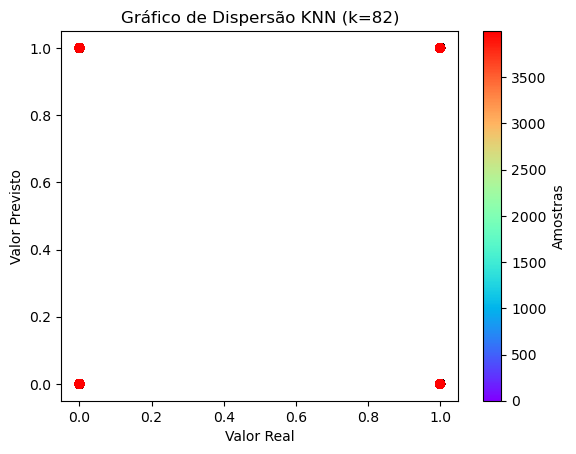

55.875


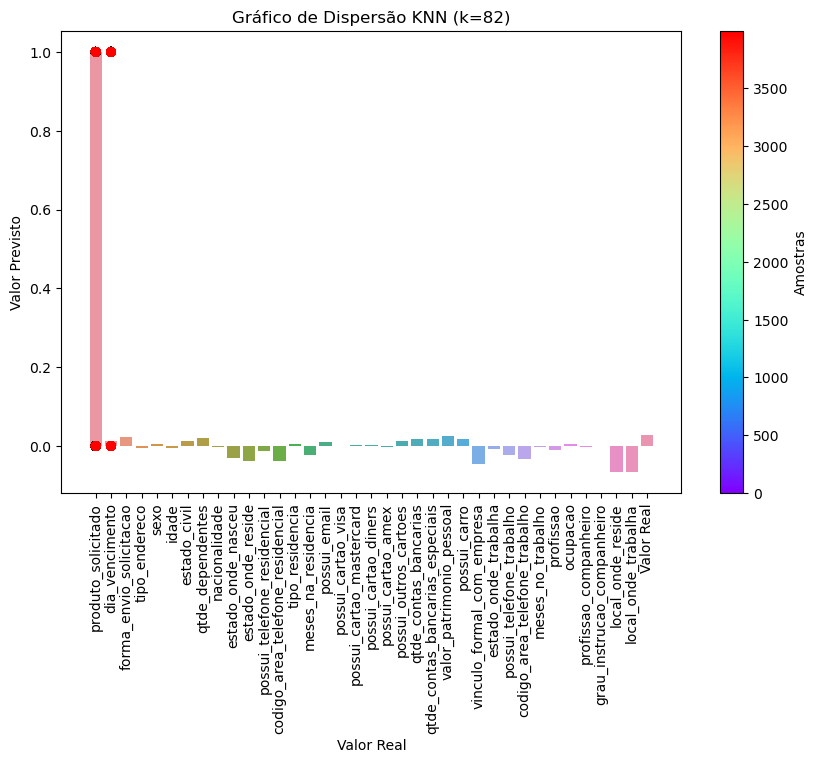

55.875


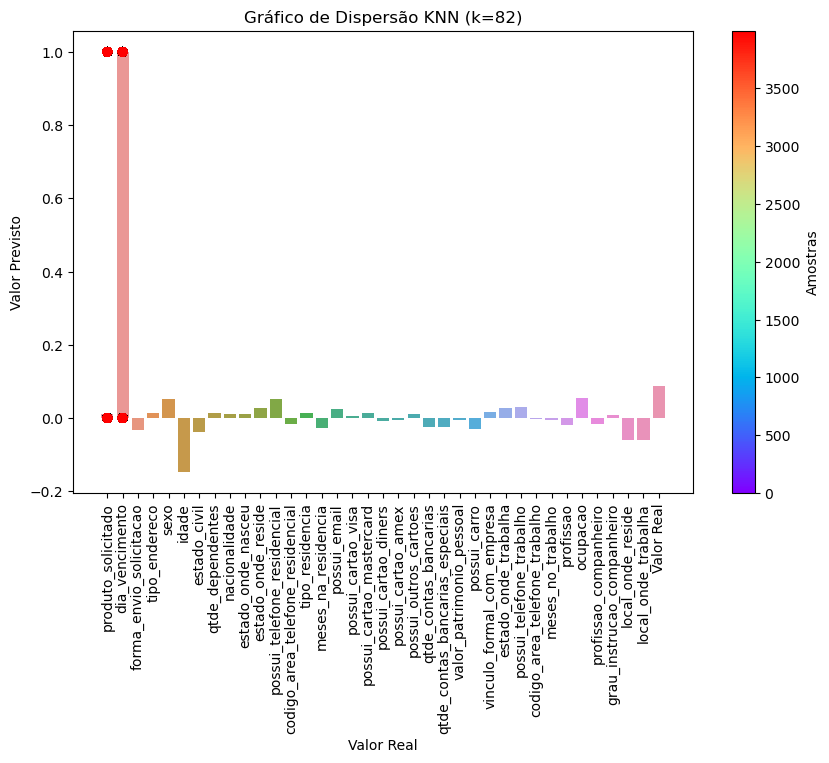

55.875


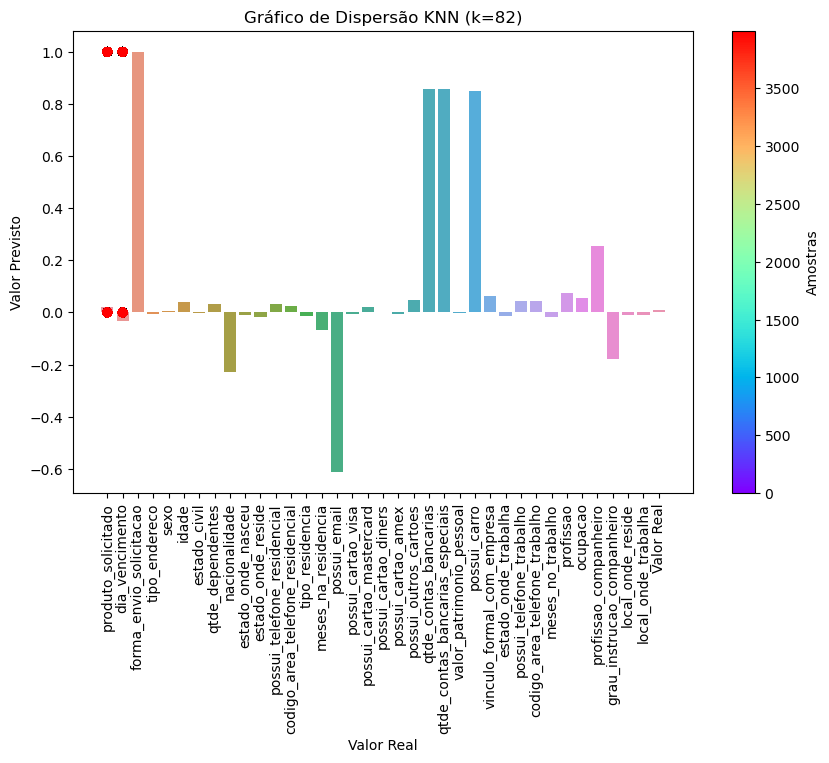

55.875


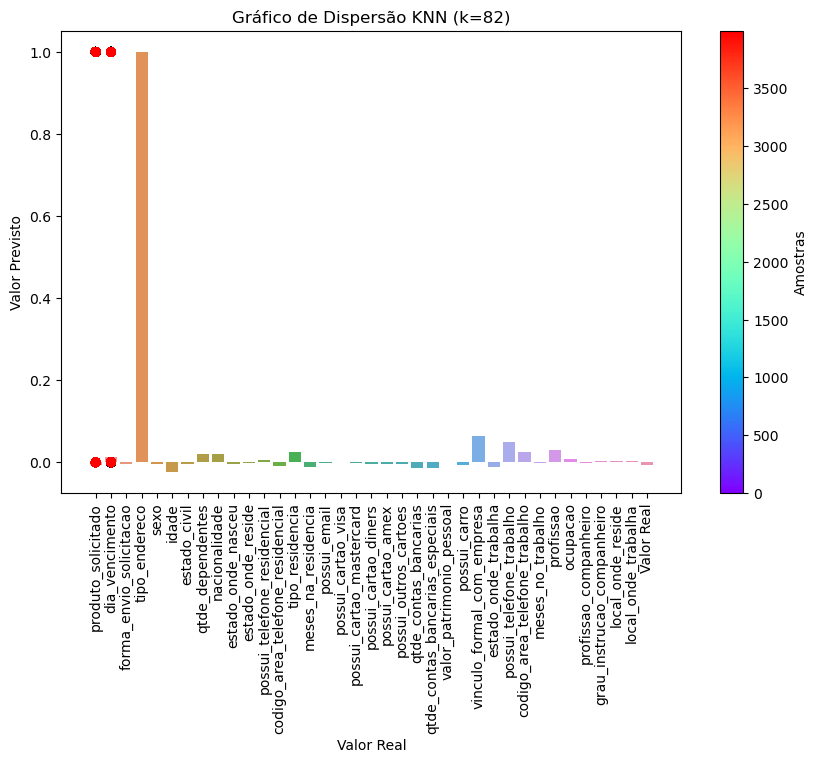

55.875


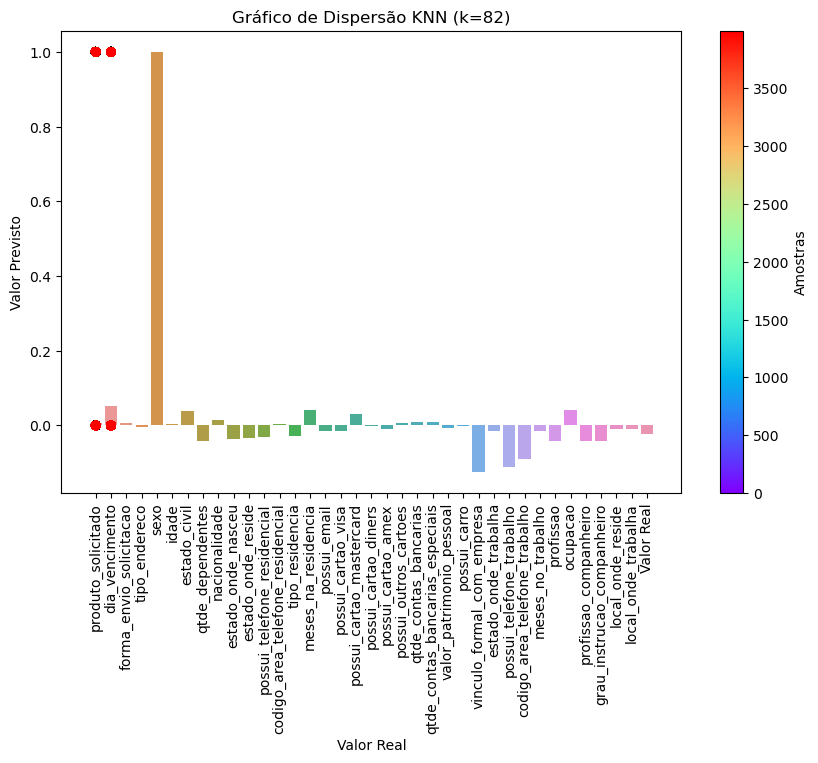

55.875


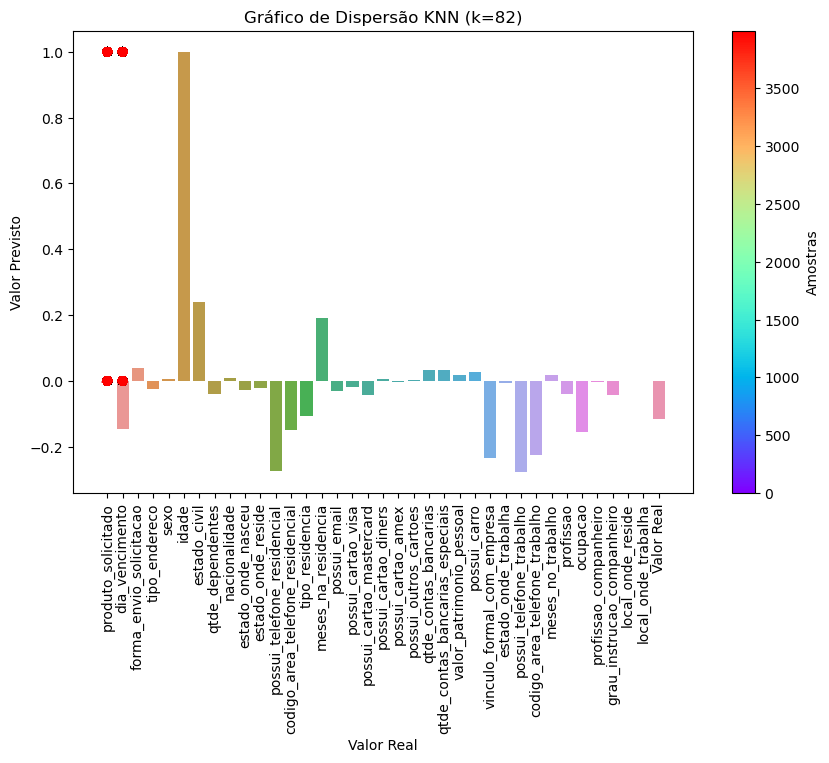

55.875


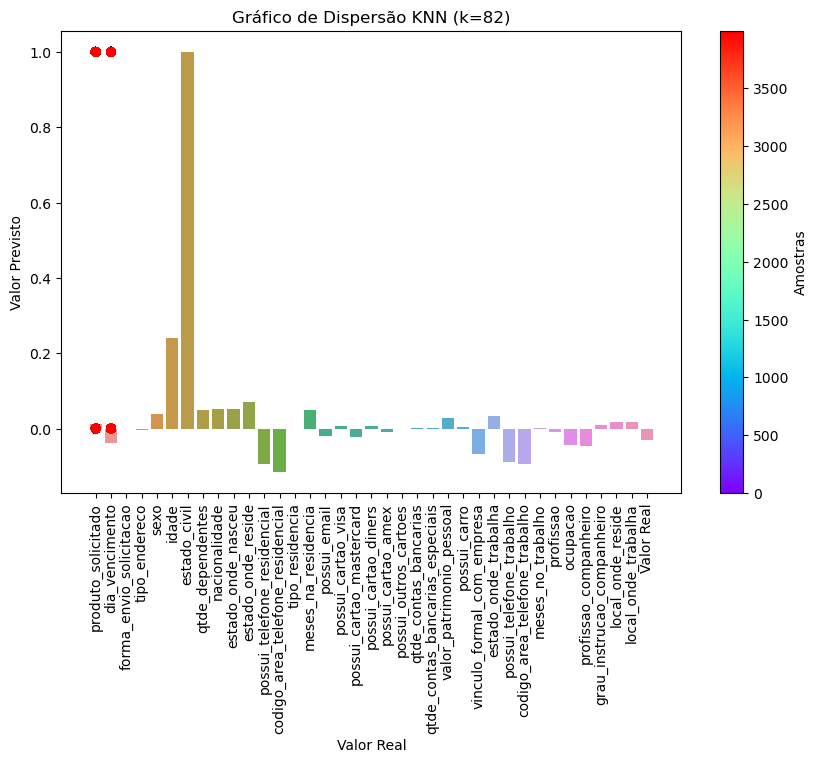

55.875


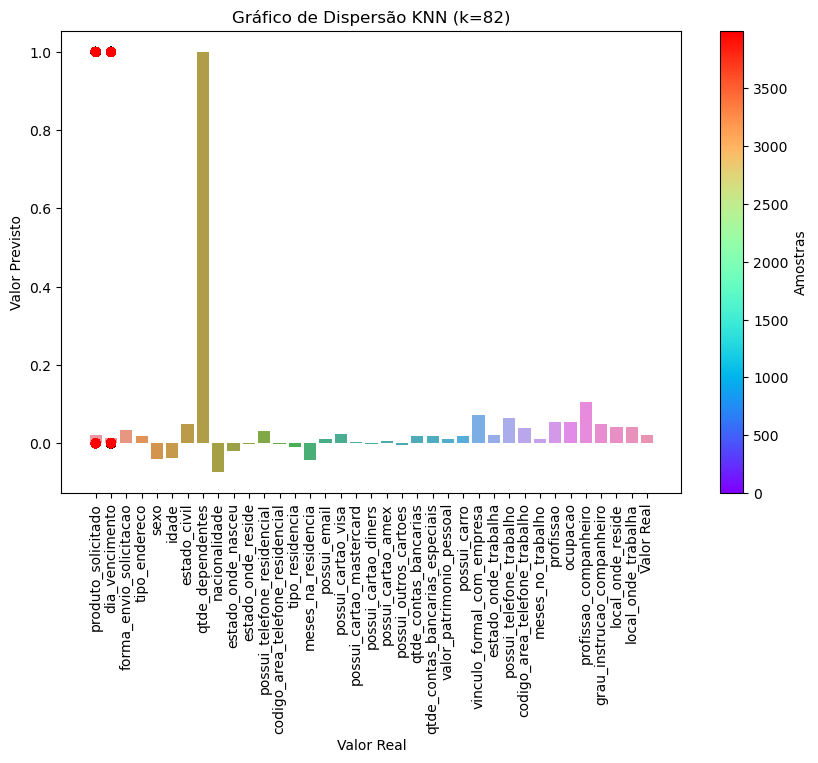

55.875


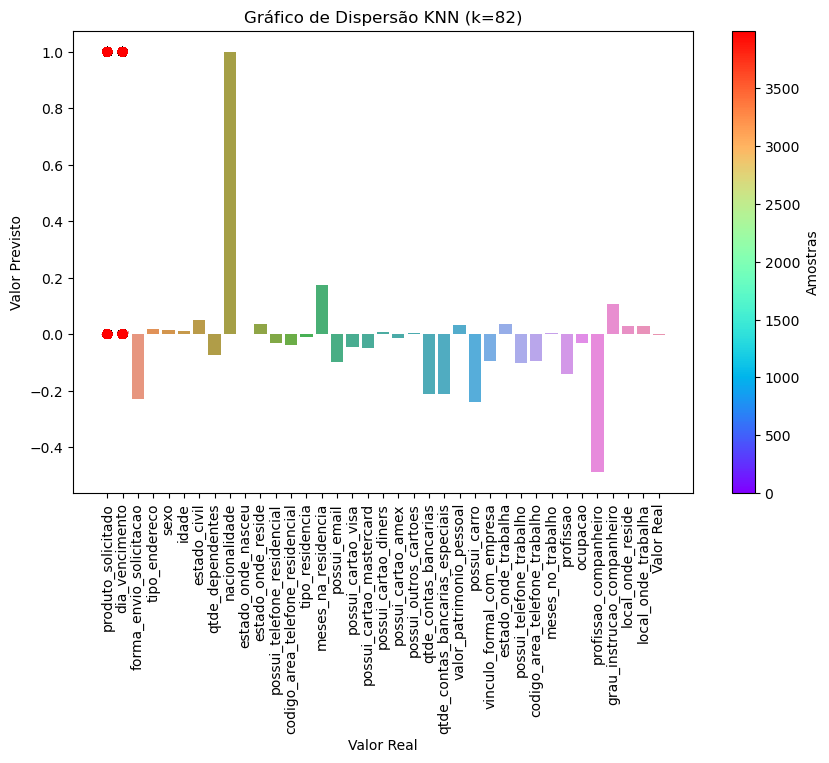

55.875


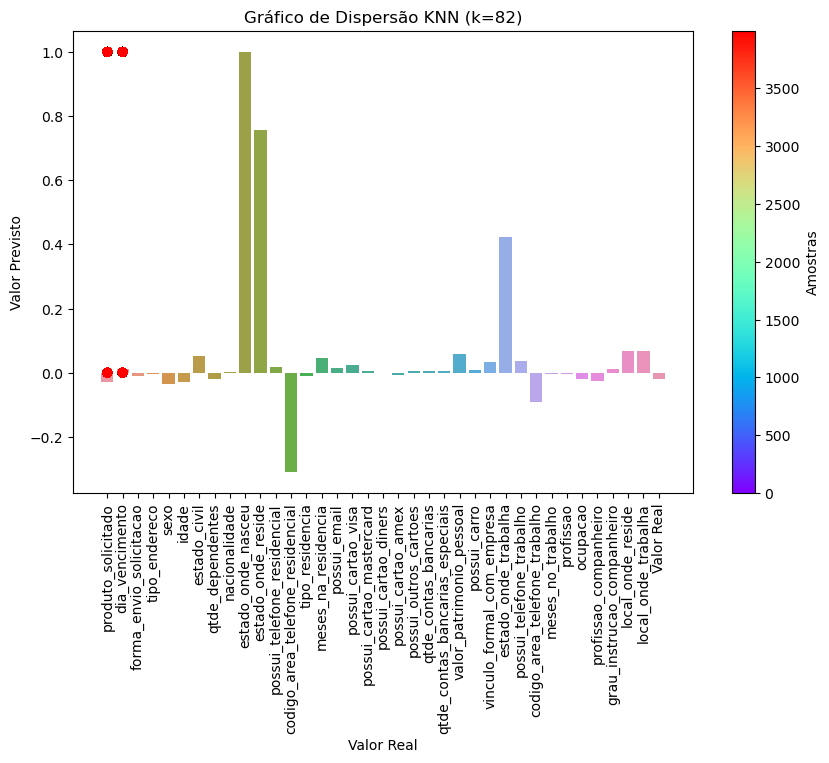

55.875


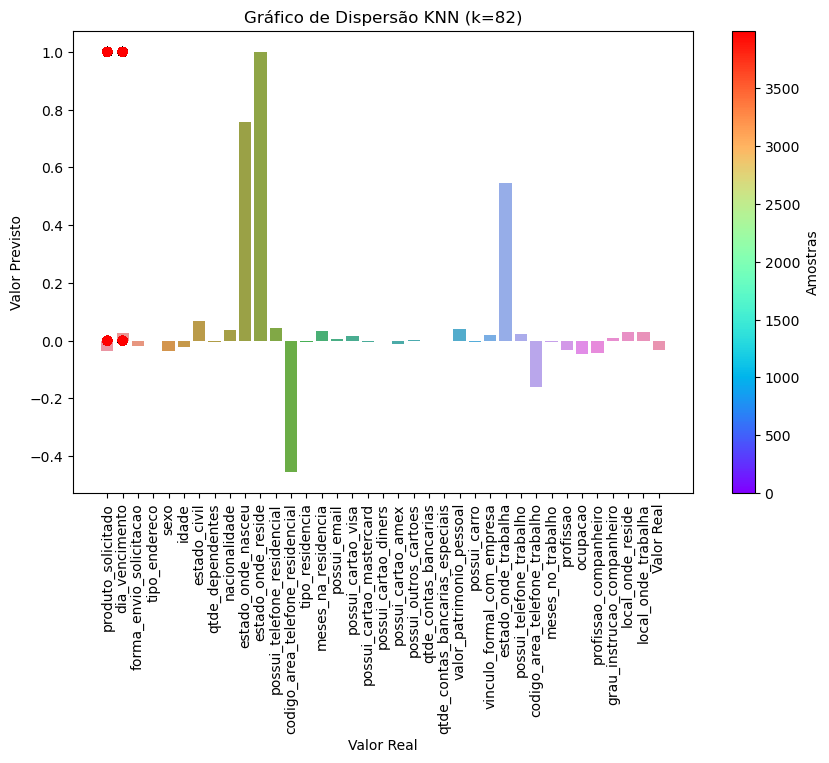

55.875


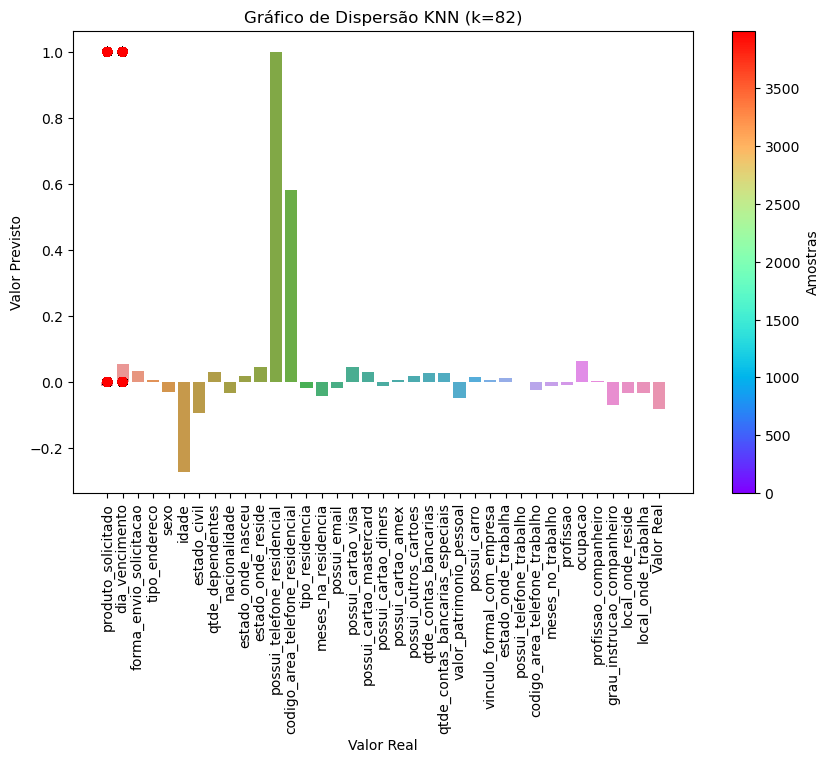

55.875


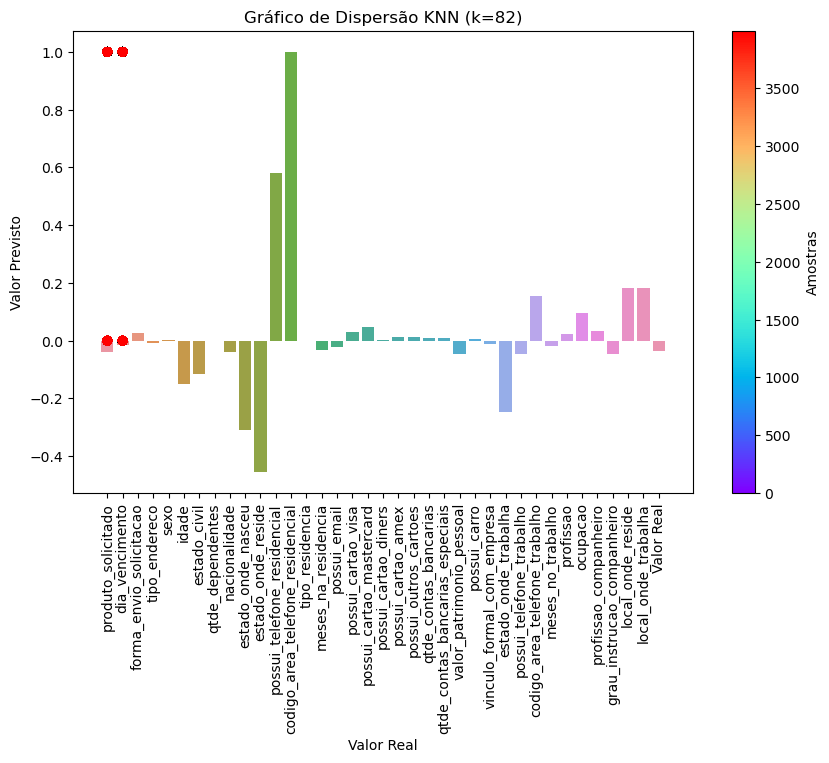

55.875


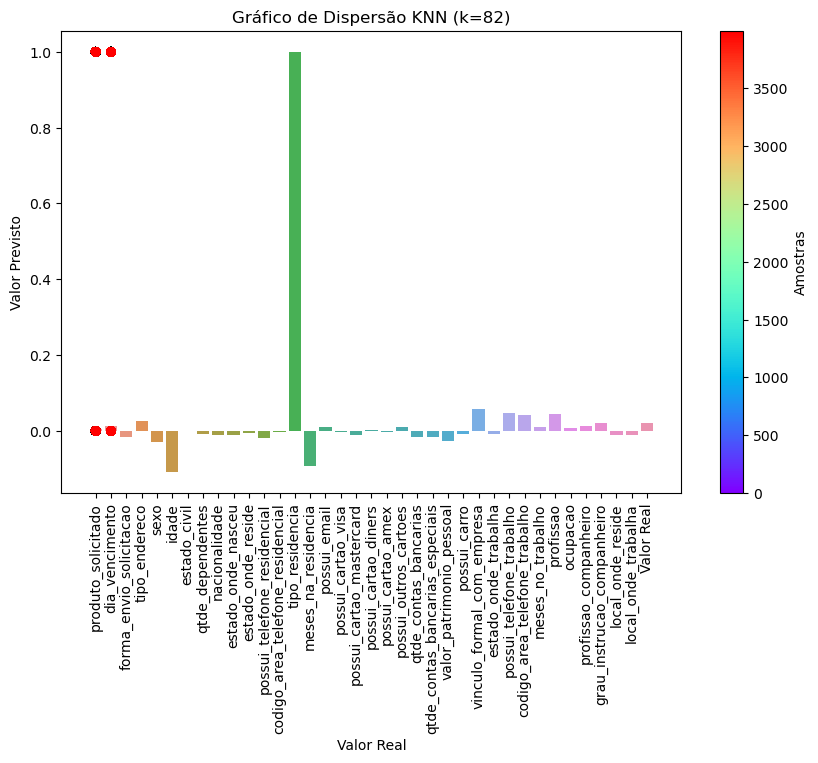

55.875


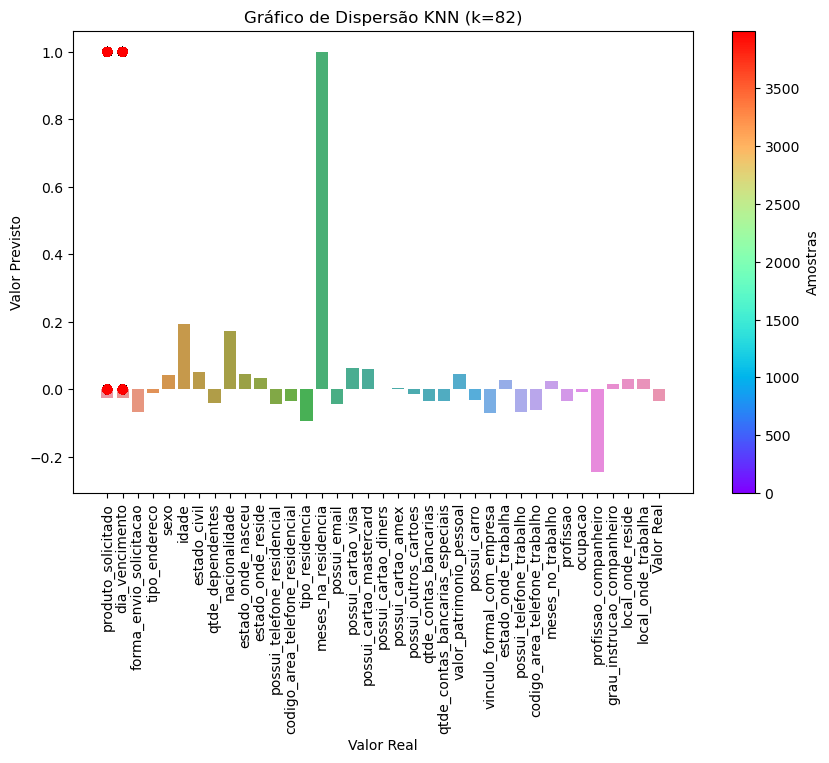

55.875


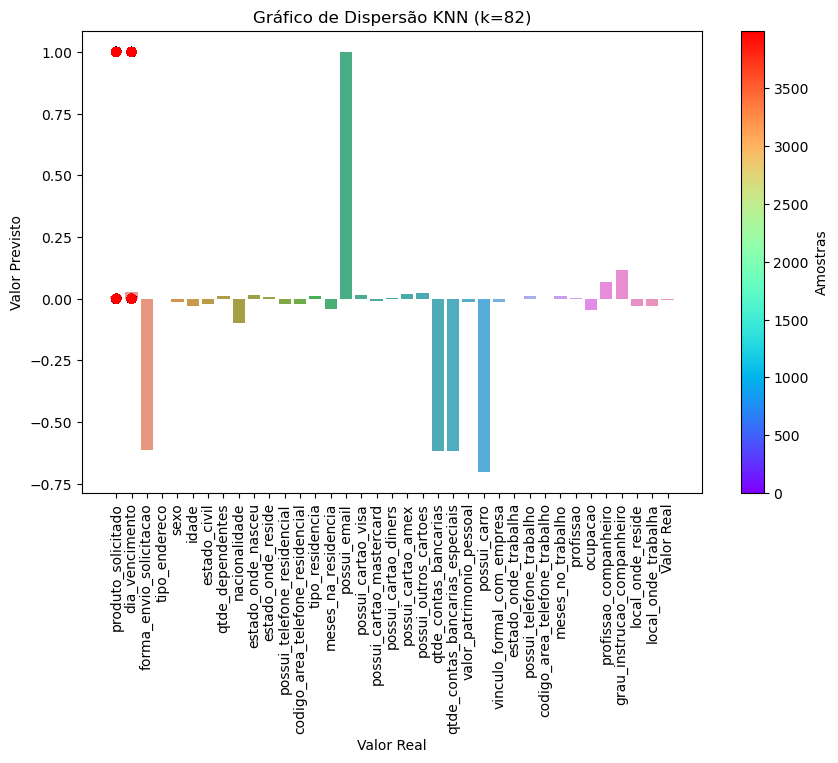

55.875


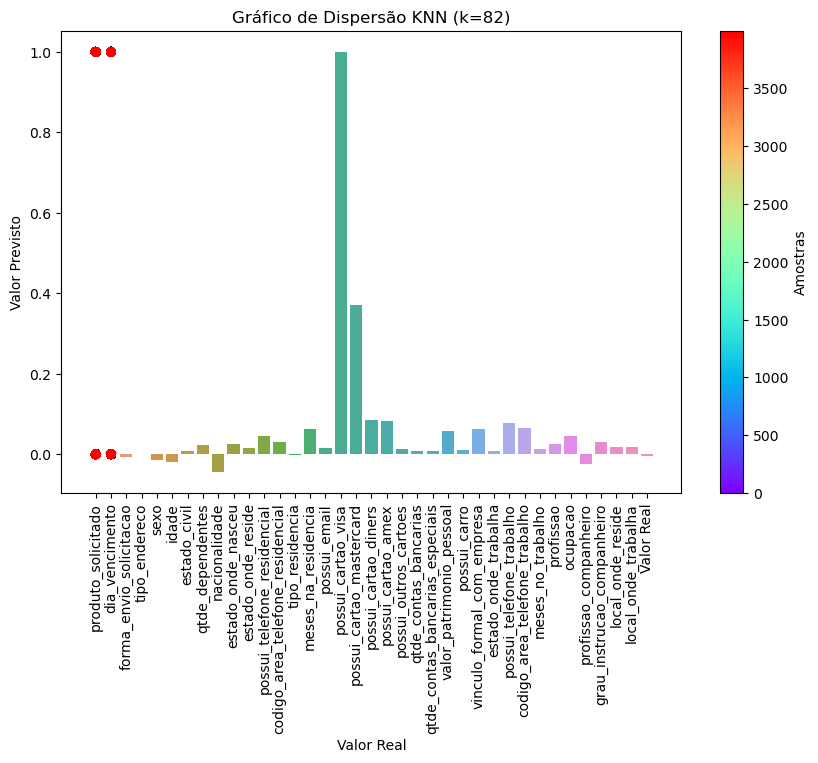

55.875


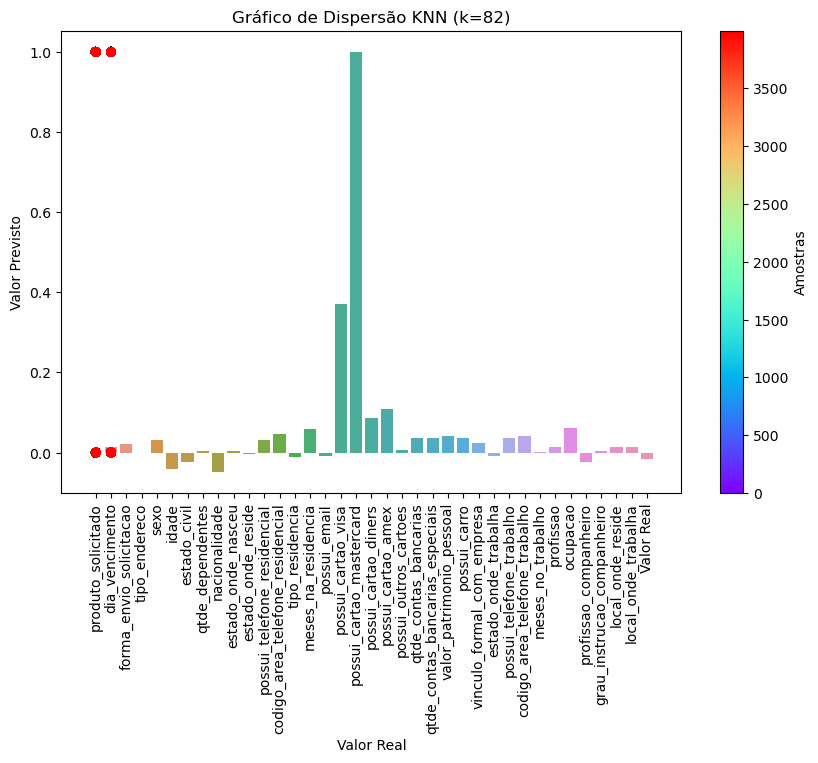

55.875


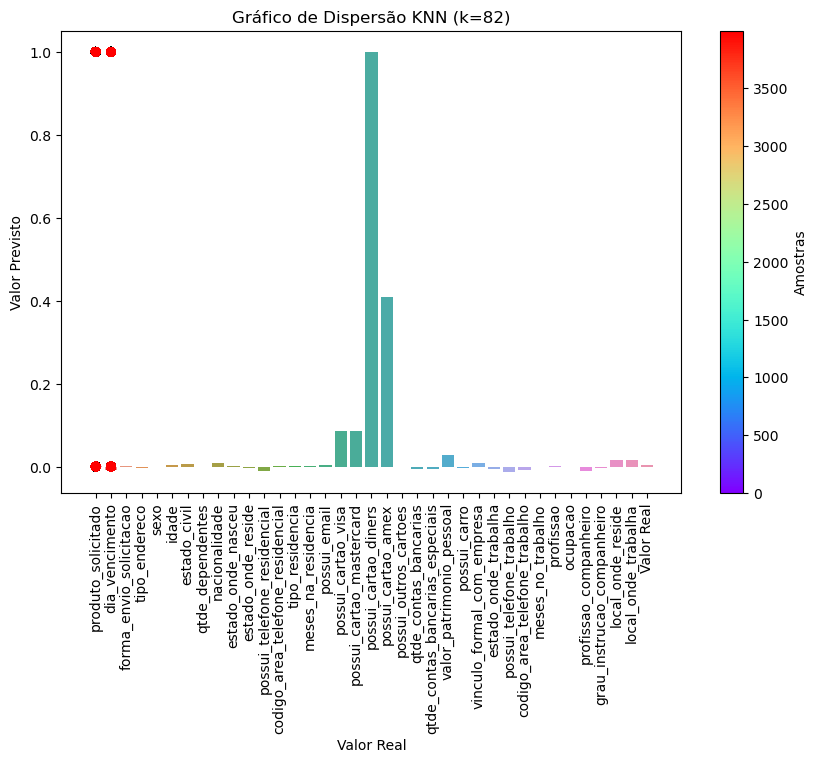

55.875


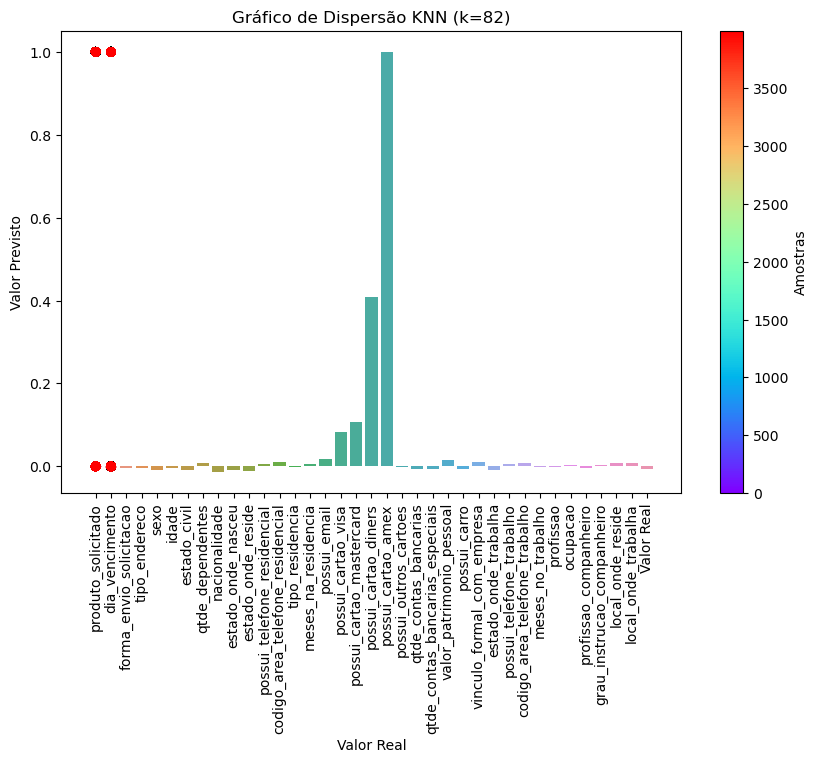

55.875


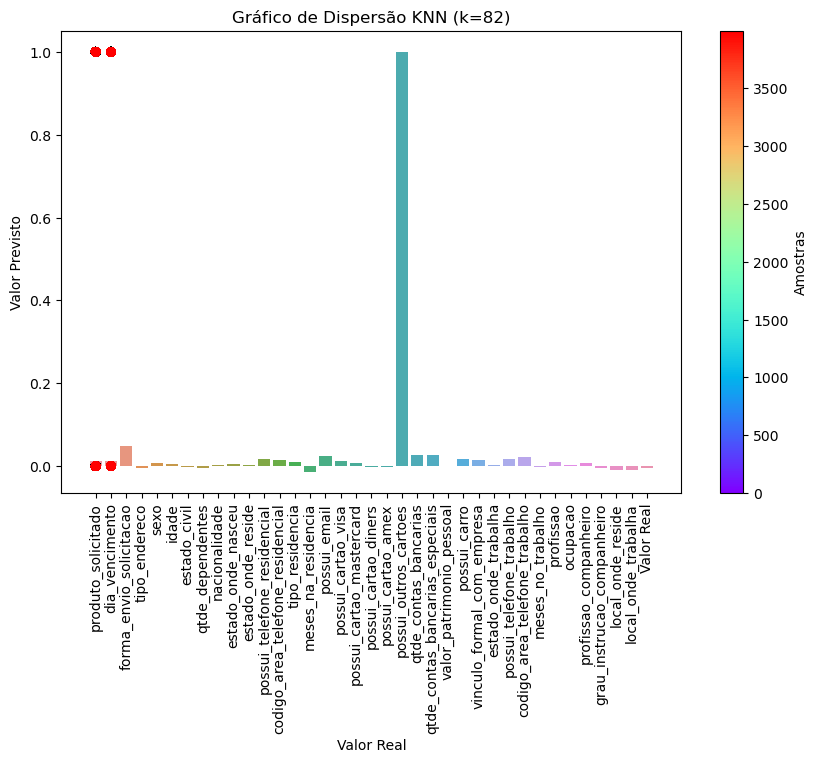

55.875


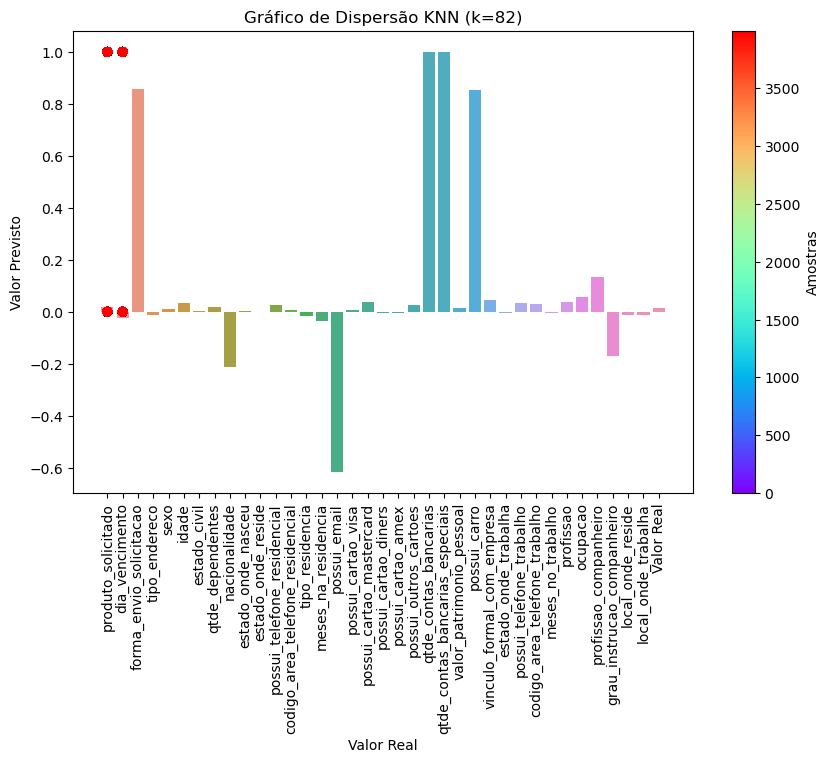

55.875


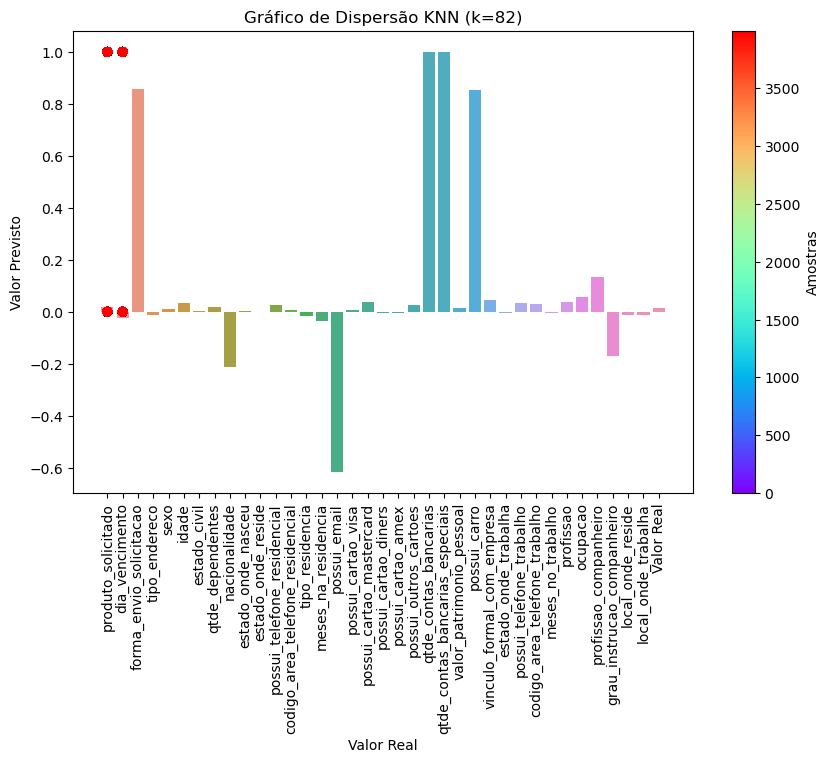

55.875


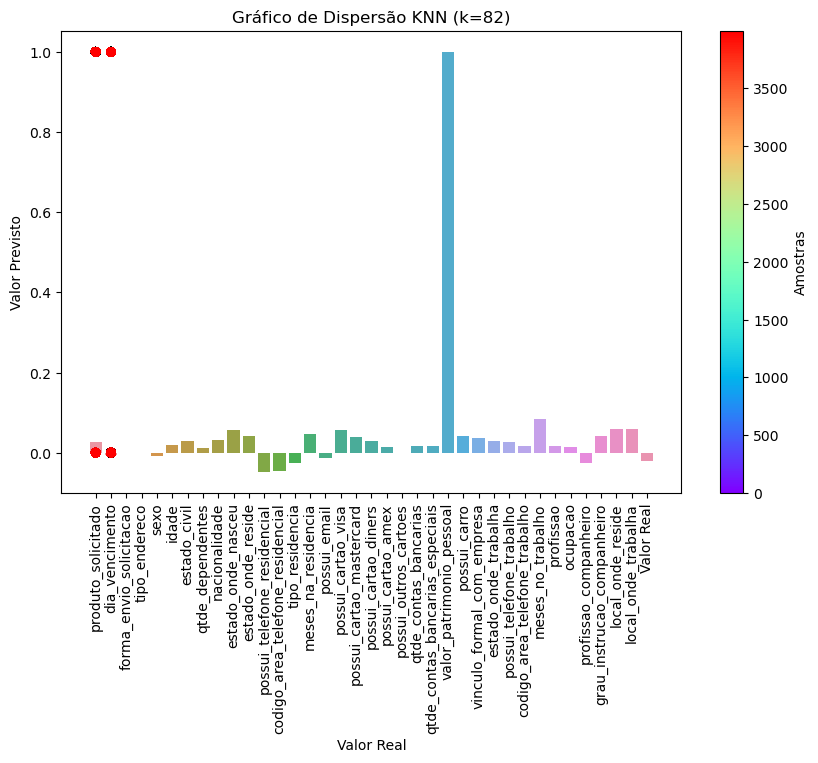

55.875


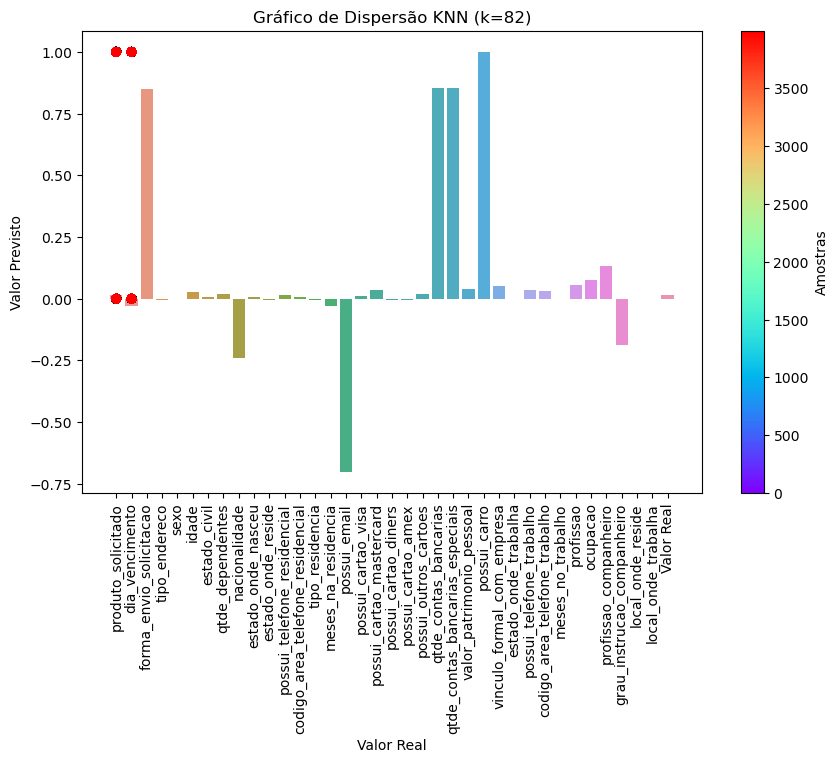

55.875


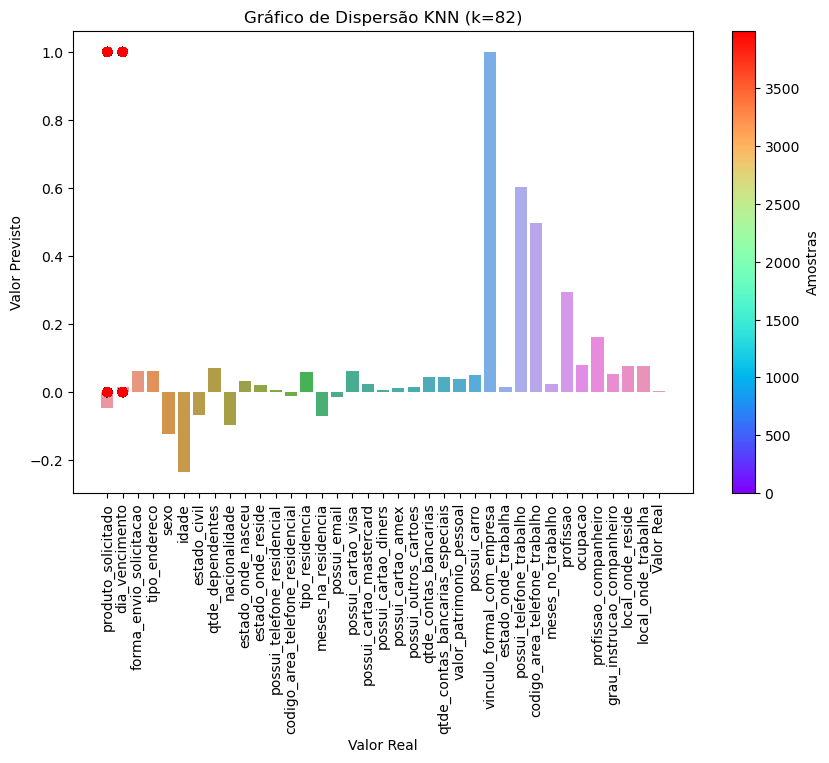

55.875


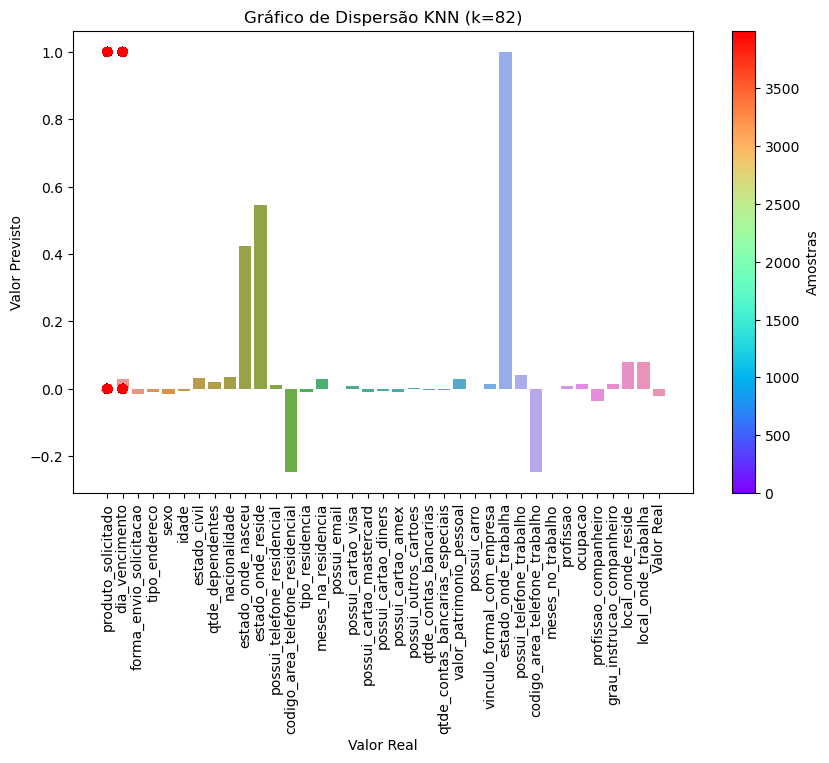

55.875


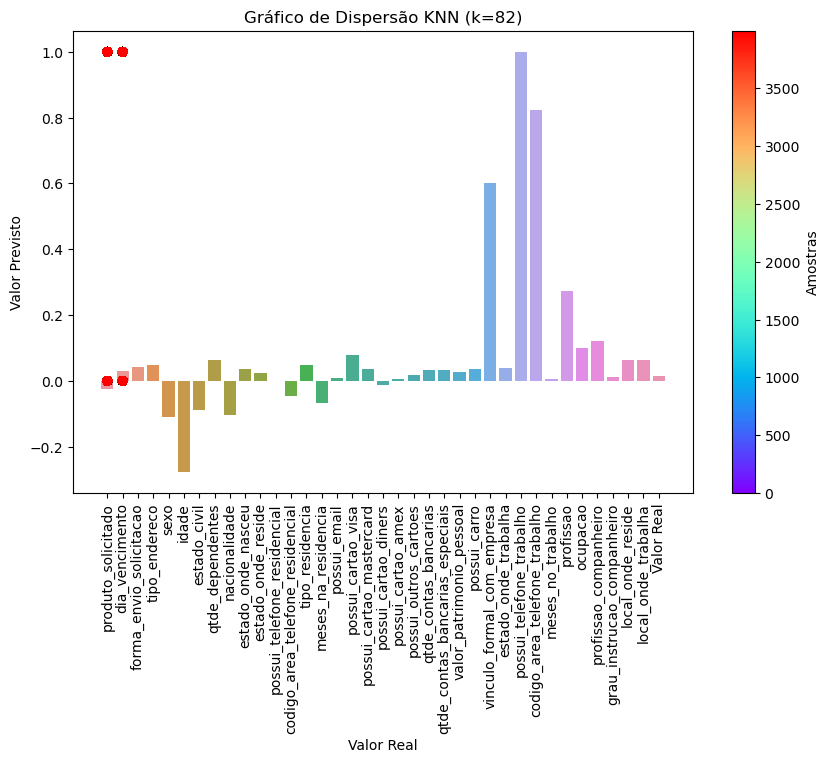

55.875


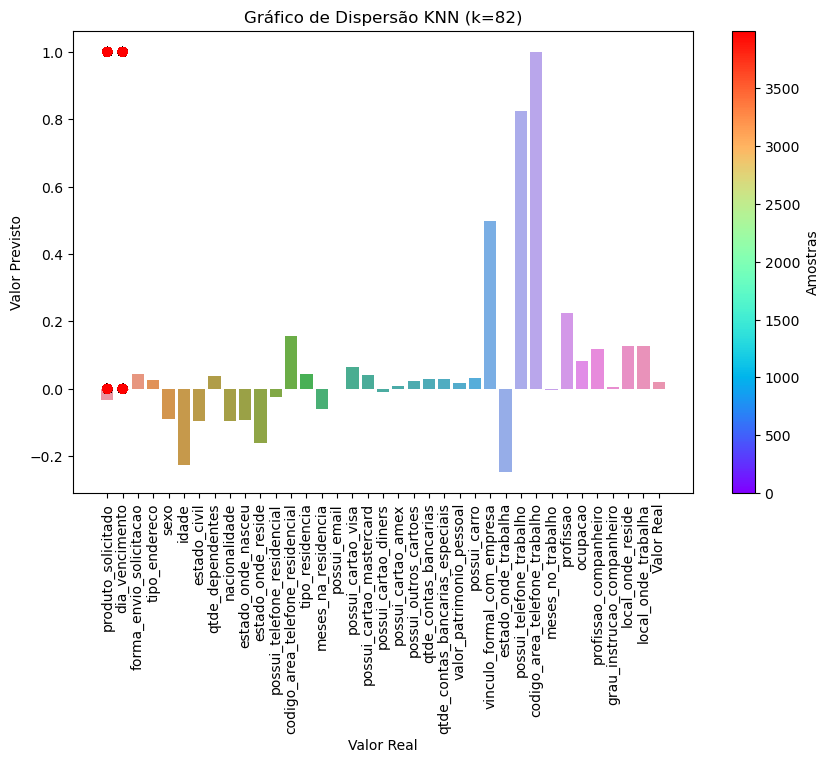

55.875


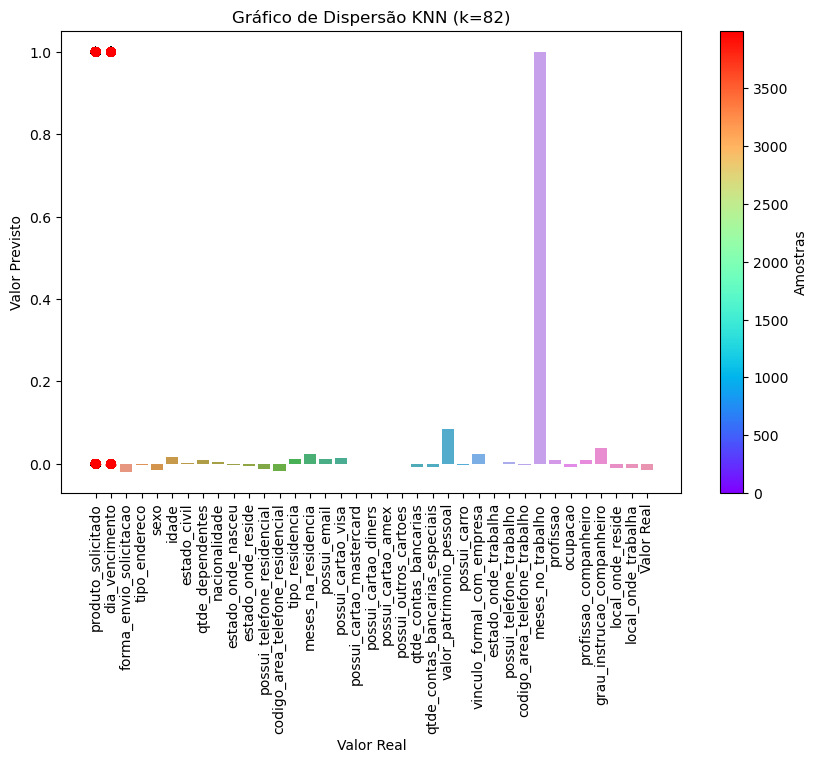

55.875


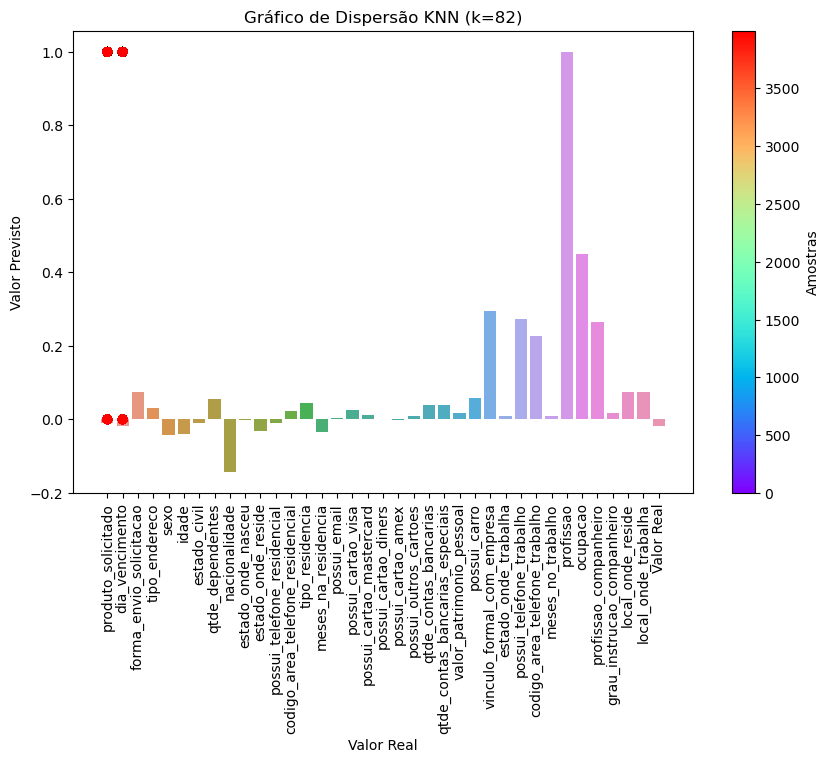

55.875


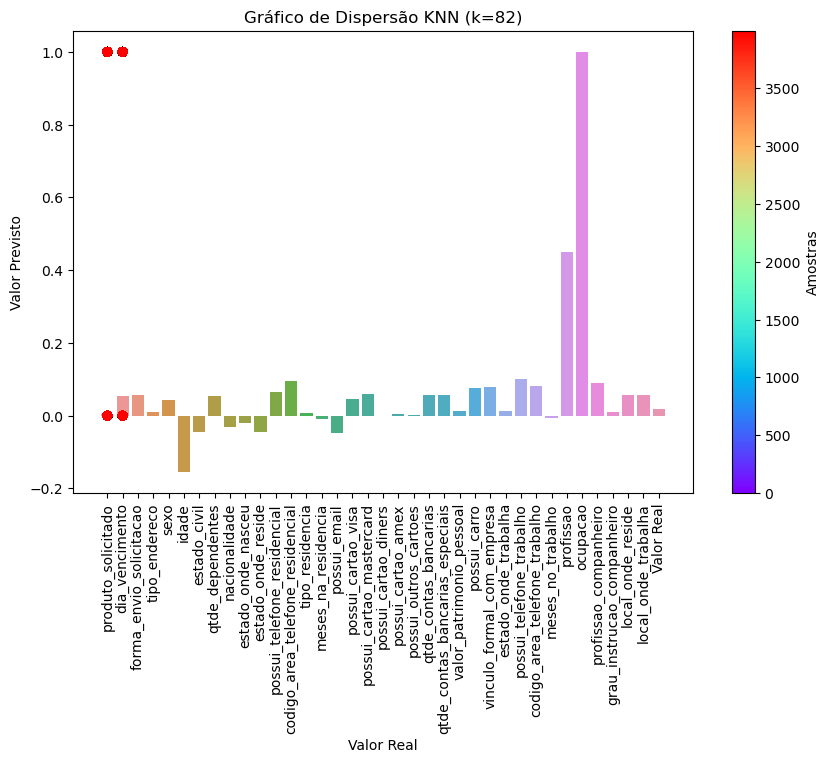

55.875


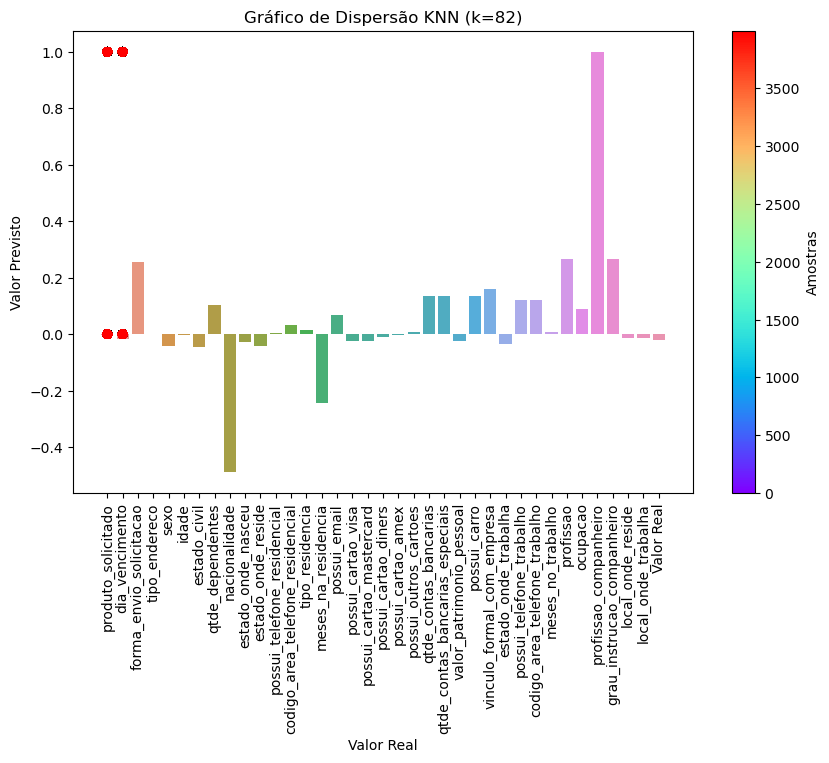

55.875


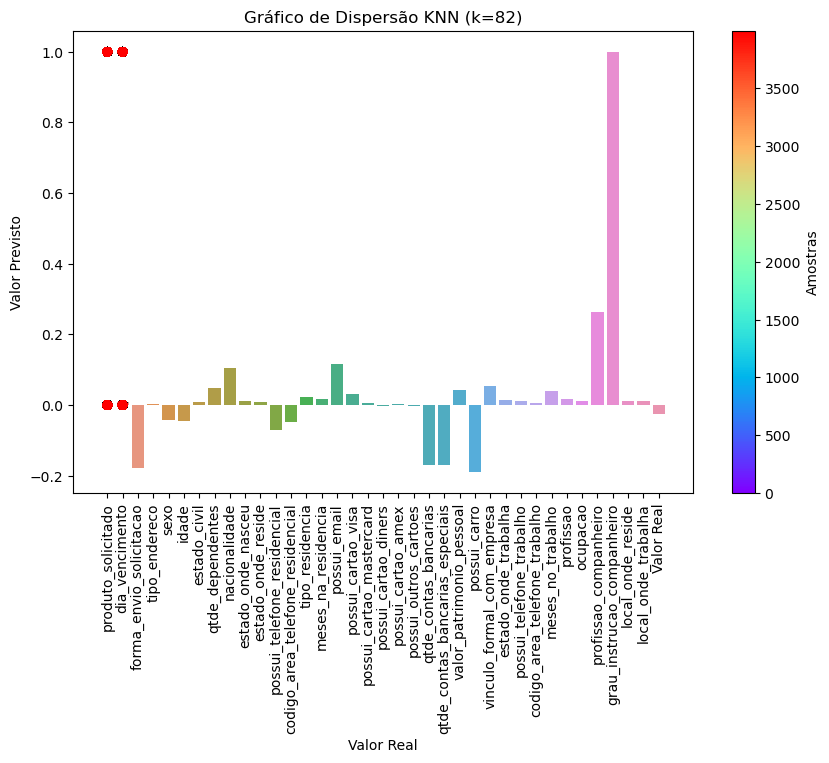

55.875


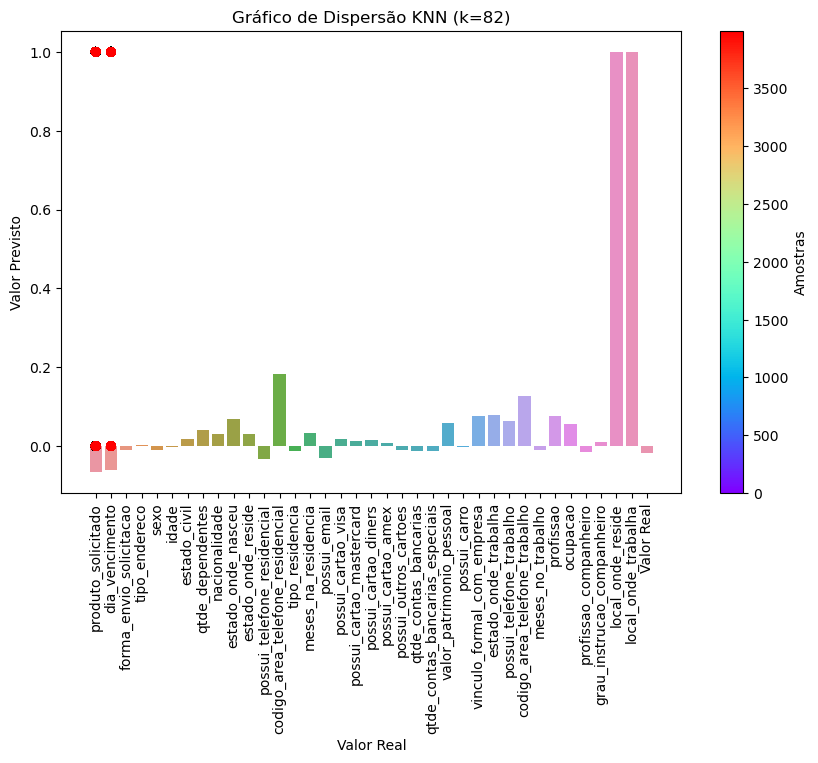

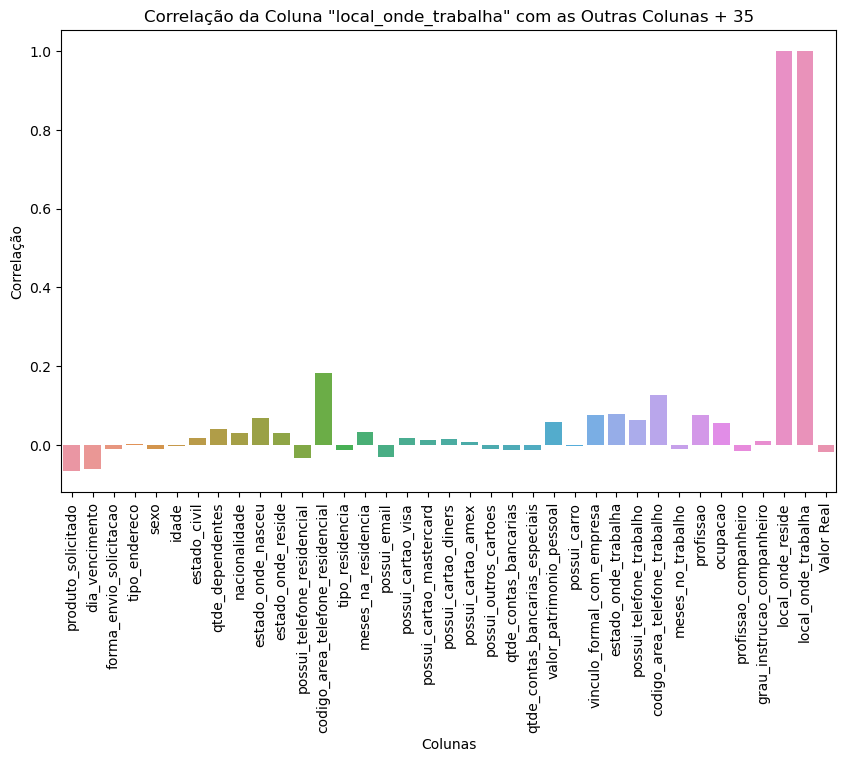

In [33]:
for i in range(len(df_train.columns) - 1):
    visualize_knn(X_train, y_train, 82, i)


56.45


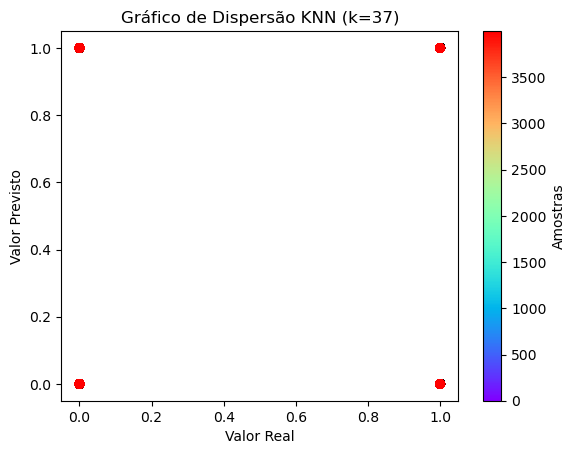

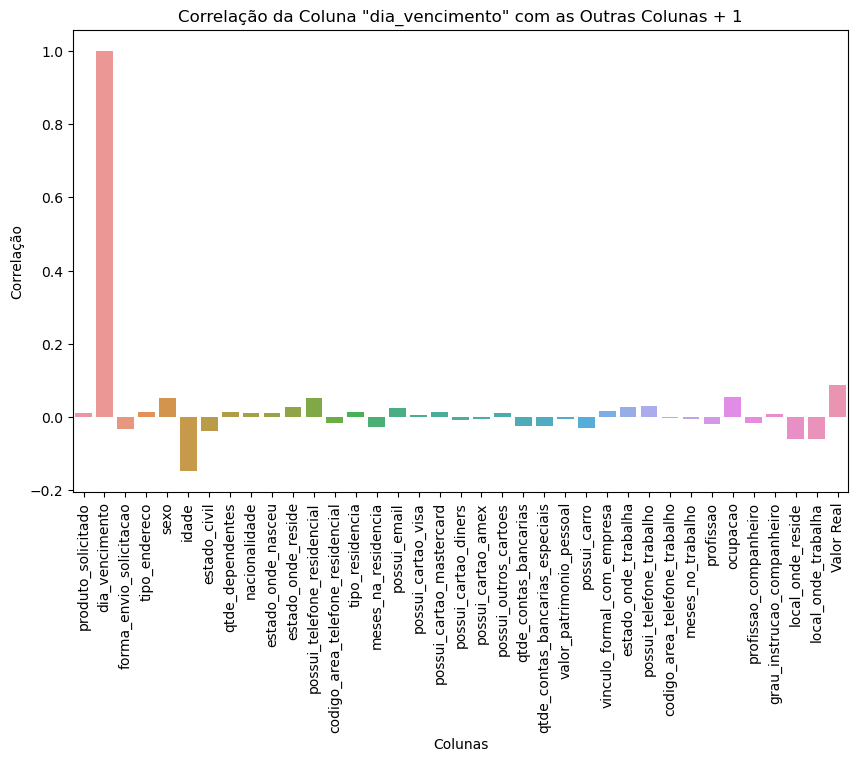

In [32]:
visualize_knn(X_train, y_train, 37, 1)

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.impute import SimpleImputer
# from sklearn.metrics import accuracy_score

# imputer = SimpleImputer(strategy='constant', fill_value=-1)

# # Impute missing values in the training data
# imputed_X_train = imputer.fit_transform(X)

# # Create an instance of the DecisionTreeClassifier class
# classifier = DecisionTreeClassifier()

# # Train the model with the imputed training data
# classifier.fit(imputed_X_train, y)

# # Impute missing values in the test data
# imputed_X_test = imputer.fit_transform(X_test)

# # Make predictions using the trained model
# predictions = classifier.predict(imputed_X_test)


In [20]:

df_test = pd.read_csv('Dataset/conjunto_de_teste.csv')

prediction_file = pd.DataFrame(predictions, columns=['inadimplente'])
prediction_file = pd.concat([df_test['id_solicitante'], prediction_file], axis=1)
prediction_file = prediction_file.to_csv('results/predictions.csv', index=False)


prediction_file = pd.read_csv('results/predictions.csv')
prediction_file.shape

prediction_file.head(10)


# print(f'{accuracy_score(y_test, predictions)*100}%')

id_solicitante  inadimplente
0           20001             0
1           20002             1
2           20003             0
3           20004             0
4           20005             0
5           20006             0
6           20007             0
7           20008             1
8           20009             1
9           20010             0